<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/Passenger_Satisfaction_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv', index_col='id')
test = pd.read_csv('/content/sample_data/test.csv', index_col='id')

In [ ]:
train.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
test = test.drop('Unnamed: 0', axis=1)
train = train.drop('Unnamed: 0', axis=1)

In [ ]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [ ]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['satisfaction'])
train['satisfaction'] = le.transform(train['satisfaction'])

le.fit(test['satisfaction'])
test['satisfaction'] = le.transform(test['satisfaction'])

In [ ]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
train['Arrival Delay in Minutes'].corr(train['satisfaction'])

-0.05758182372581

In [ ]:
train = train.dropna()
# mean_ = train['Arrival Delay in Minutes'].mean()
# train['Arrival Delay in Minutes'].fillna(mean_, inplace=True)

In [ ]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [ ]:
test = test.dropna()
# mean_test = test['Arrival Delay in Minutes'].mean()
# test['Arrival Delay in Minutes'].fillna(mean_test, inplace=True)

# **PLOTS**✈

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

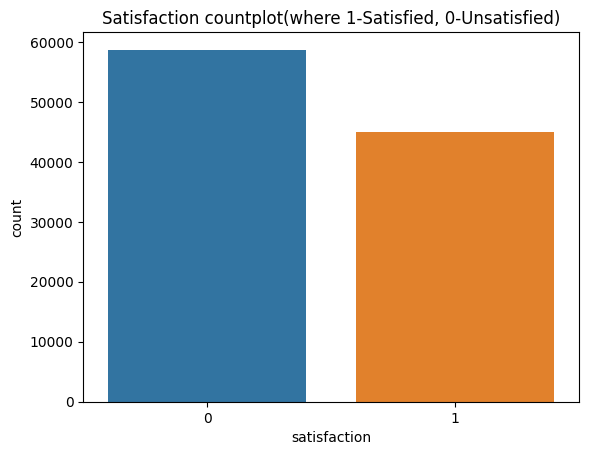

In [ ]:
plt.title('Satisfaction countplot(where 1-Satisfied, 0-Unsatisfied)')
sns.countplot(data=train, x='satisfaction');

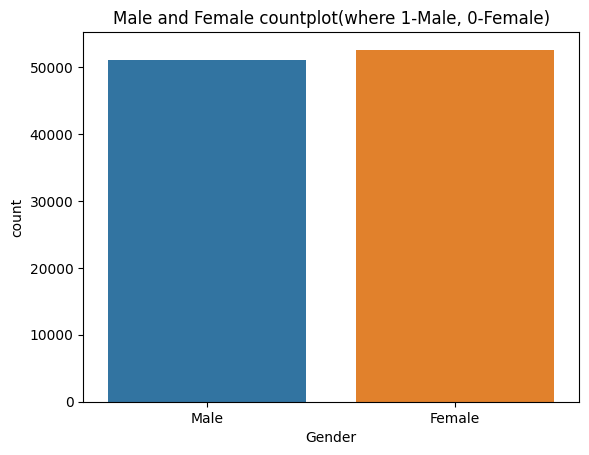

In [ ]:
plt.title('Male and Female countplot(where 1-Male, 0-Female)')
sns.countplot(data=train, x='Gender');

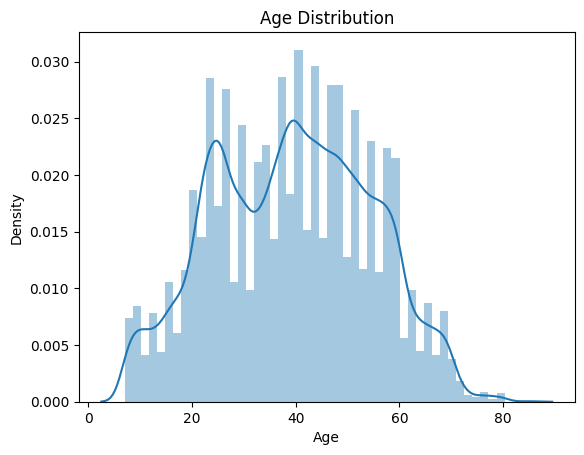

In [ ]:
plt.title('Age Distribution')
sns.distplot(train['Age']);

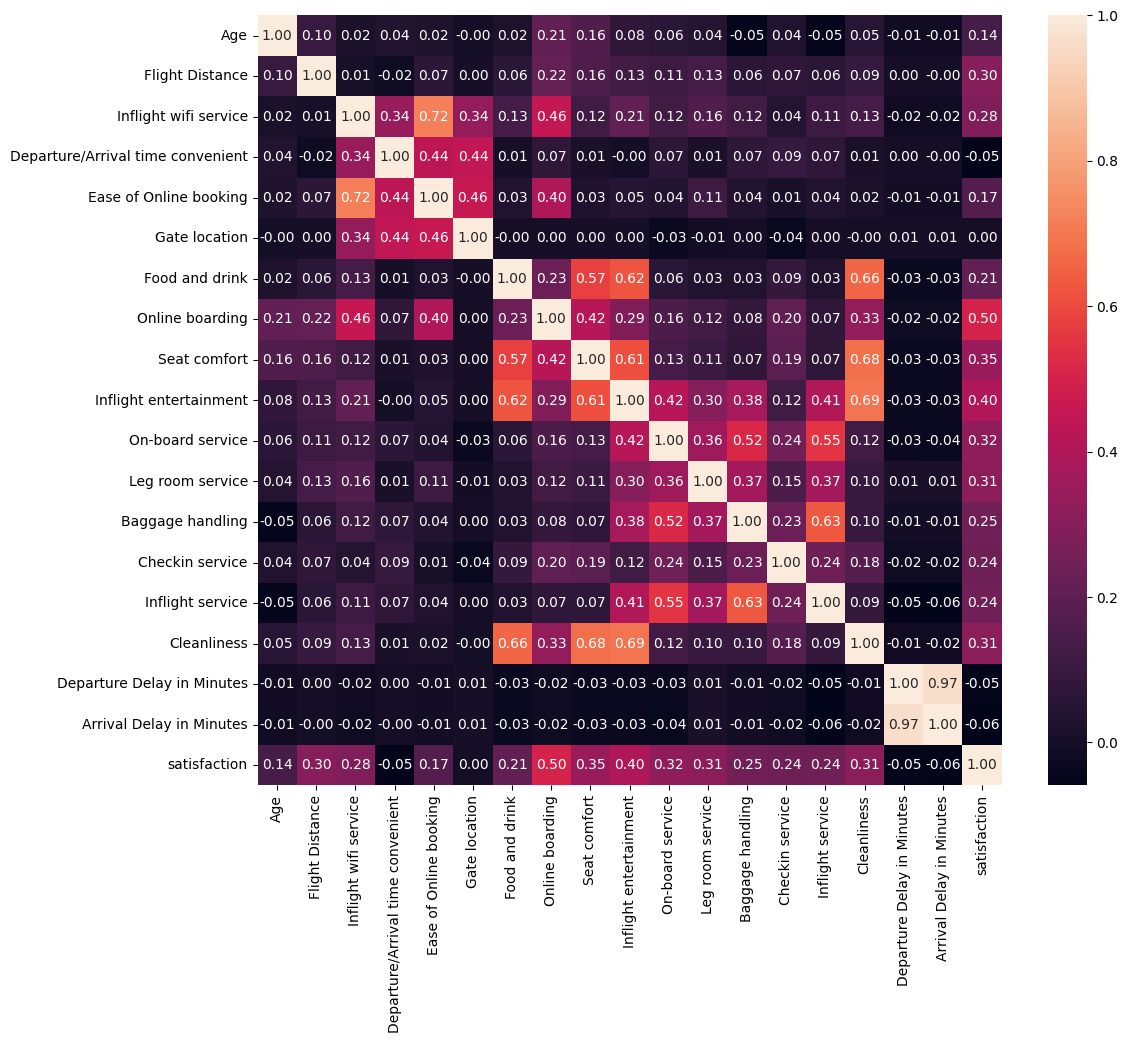

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f');

# **DATA PREPROCESSING**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1

In [ ]:
train.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0


In [ ]:
train['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [ ]:
train['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [ ]:
le.fit(train['Gender'])
train['Gender'] = le.transform(train['Gender'])

In [ ]:
le.fit(test['Gender'])
test['Gender'] = le.transform(test['Gender'])

In [ ]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,1,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
5047,1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
24026,0,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
119299,1,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
train = pd.get_dummies(train)

In [ ]:
train.head()

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
70172,1,13,460,3,4,3,1,5,3,5,...,25,18.0,0,1,0,0,1,0,0,1
5047,1,25,235,3,2,3,3,1,3,1,...,1,6.0,0,0,1,1,0,1,0,0
110028,0,26,1142,2,2,2,2,5,5,5,...,0,0.0,1,1,0,1,0,1,0,0
24026,0,25,562,2,5,5,5,2,2,2,...,11,9.0,0,1,0,1,0,1,0,0
119299,1,61,214,3,3,3,3,4,5,5,...,0,0.0,1,1,0,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test)

In [ ]:
test.head()

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
19556,0,52,160,5,4,3,4,3,4,3,...,50,44.0,1,1,0,1,0,0,1,0
90035,0,36,2863,1,1,3,1,5,4,5,...,0,0.0,1,1,0,1,0,1,0,0
12360,1,20,192,2,0,2,4,2,2,2,...,0,0.0,0,0,1,1,0,0,1,0
77959,1,44,3377,0,0,0,2,3,4,4,...,0,6.0,1,1,0,1,0,1,0,0
36875,0,49,1182,2,3,4,3,4,1,2,...,0,20.0,1,1,0,1,0,0,1,0


In [ ]:
X_train = train.drop('satisfaction', axis=1)
y_train = train['satisfaction']

In [ ]:
X_test = test.drop('satisfaction', axis=1)
y_test = test['satisfaction']

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print('=' * 60)
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (103594, 26)
y_train shape: (103594,)
X_test shape: (25893, 26)
y_test shape: (25893,)


# **MODEL**

**I will follow this official cheat sheet from sklearn:** <br>
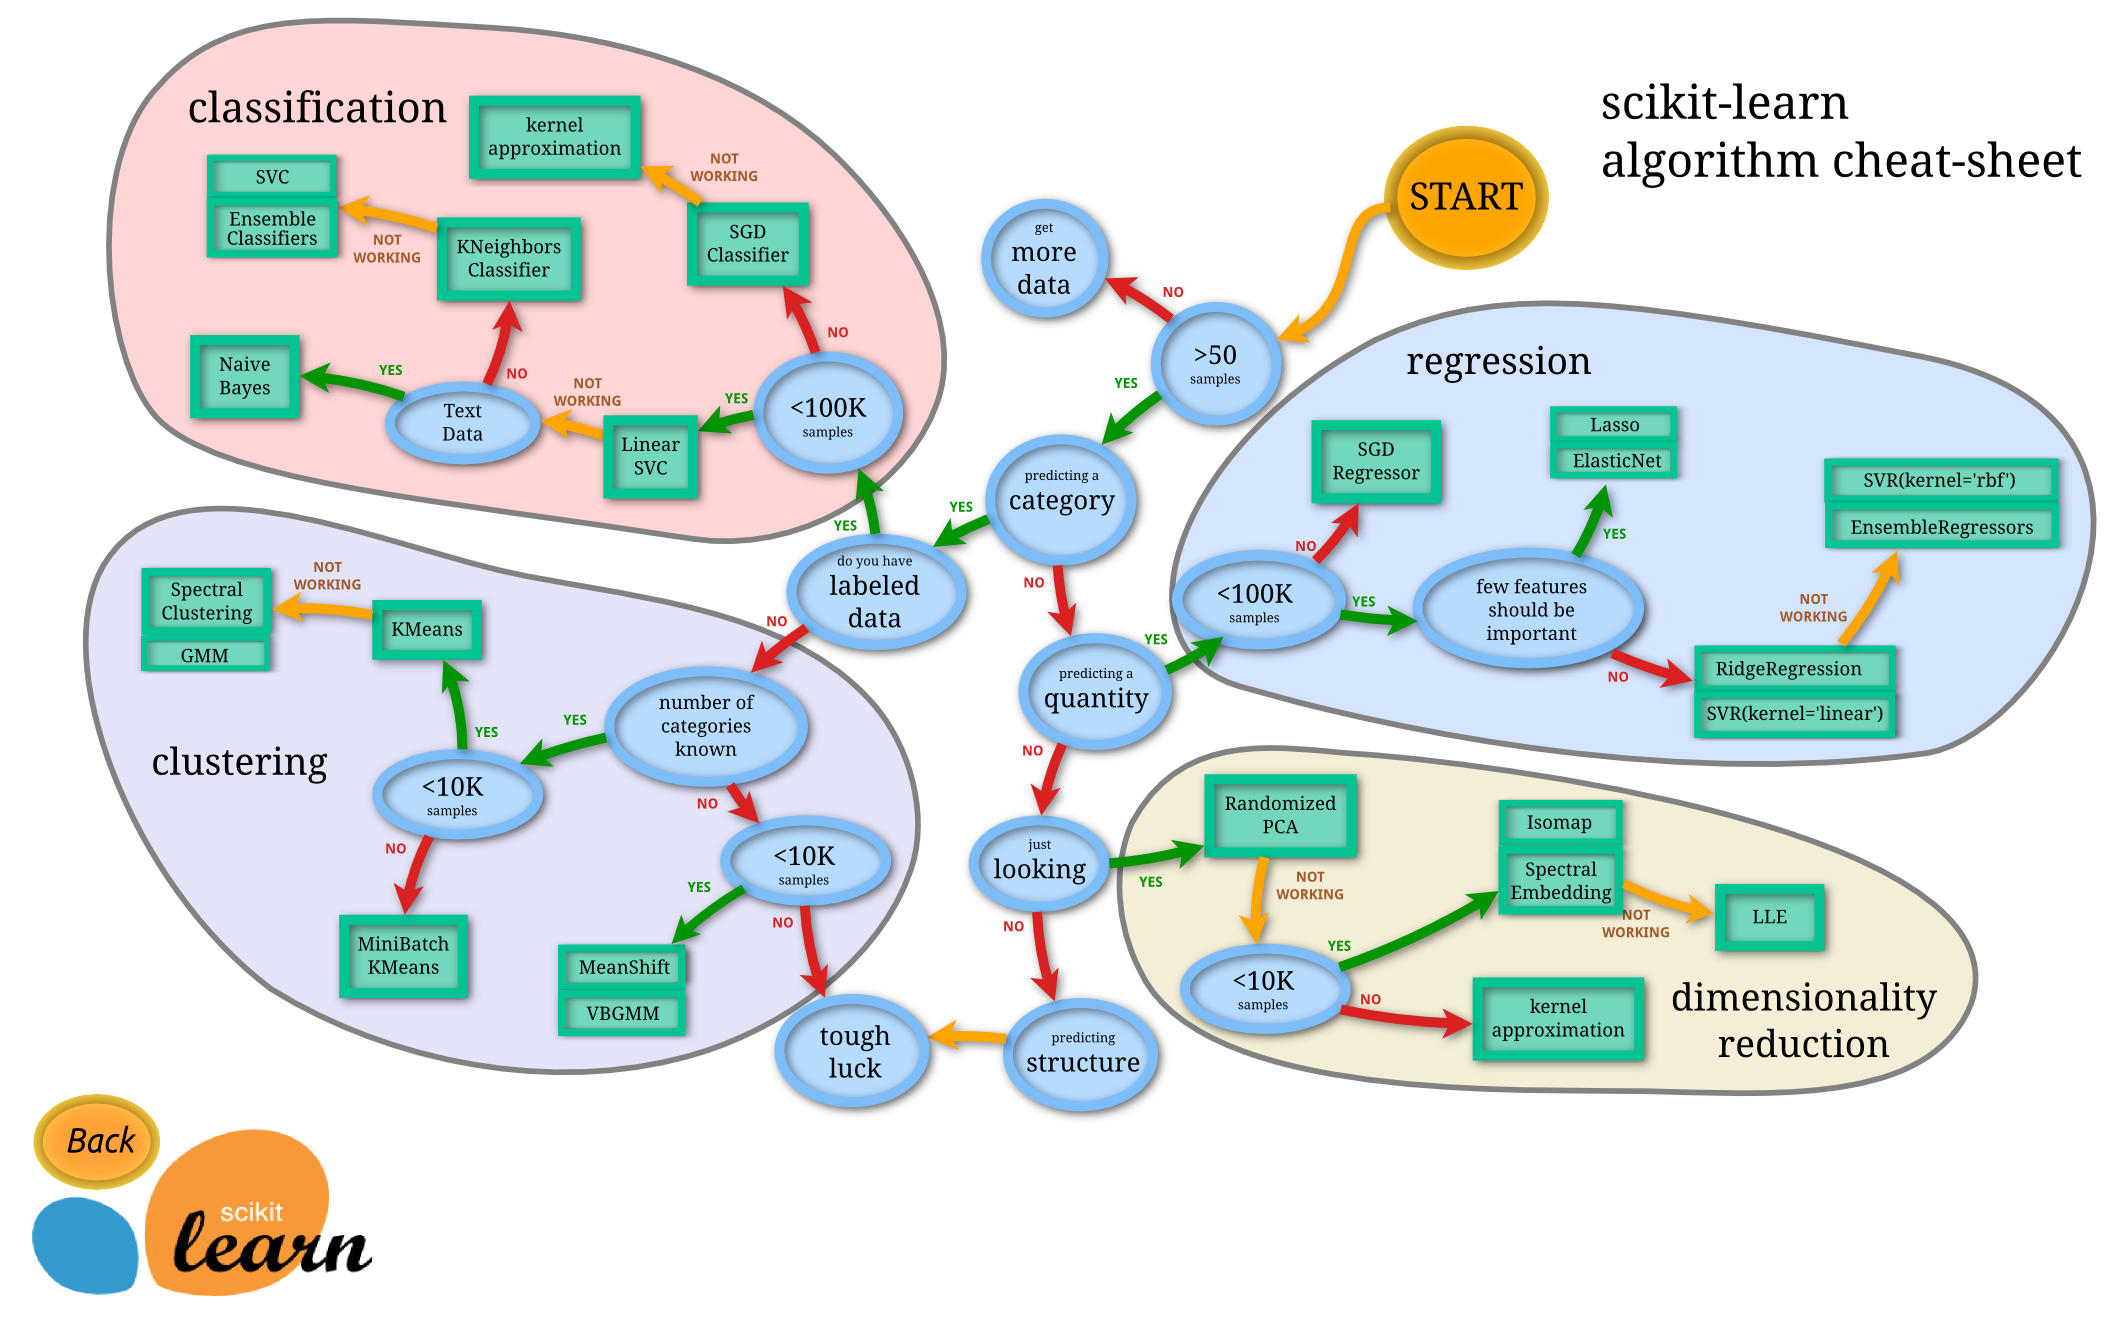

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier()

In [ ]:
clf.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8434712084347121

P.S - Mayb it's not the best code.
But it's beginner friendly as I'm beginner too👶

# **P.S CODE ALSO AVAILABLE ON <a href='https://www.kaggle.com/code/venchislav/passenger-satisfaction-sgd-beginner-friendly'>KAGGLE</a>**